In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/Rotten Tomatoes/rotten_tomatoes_critic_reviews.csv")

df.head()



,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [6]:
rt = df[['review_date' , 'review_type']]

rt

,review_date,review_type
0,2010-02-06,Fresh
1,2010-02-06,Fresh
2,2010-02-09,Fresh
3,2010-02-09,Fresh
4,2010-02-10,Rotten
...,...,...
1130012,2005-11-02,Rotten
1130013,2007-03-07,Fresh
1130014,2010-09-16,Fresh
1130015,2011-02-28,Rotten


In [7]:
# Convert 'review_date' to datetime format
rt['review_date'] = pd.to_datetime(rt['review_date'])

# Extract the year and overwrite the 'review_date' column
rt['review_date'] = rt['review_date'].dt.year

# Optionally, you might want to rename the column to 'review_year' for clarity
rt = rt.rename(columns={'review_date': 'review_year'})


/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_74826/2650158592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['review_date'] = pd.to_datetime(rt['review_date'])
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_74826/2650158592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['review_date'] = rt['review_date'].dt.year


In [10]:
rt_grouped = rt.groupby(by=['review_year', 'review_type']).count()
rt_grouped

Empty DataFrame
Columns: []
Index: [(1800, Fresh), (1800, Rotten), (1923, Rotten), (1927, Fresh), (1928, Fresh), (1929, Rotten), (1931, Rotten), (1932, Fresh), (1933, Fresh), (1934, Fresh), (1935, Fresh), (1936, Rotten), (1937, Fresh), (1938, Fresh), (1939, Fresh), (1939, Rotten), (1941, Fresh), (1942, Fresh), (1943, Fresh), (1944, Fresh), (1946, Fresh), (1948, Fresh), (1949, Fresh), (1950, Fresh), (1951, Fresh), (1953, Fresh), (1954, Fresh), (1956, Fresh), (1957, Fresh), (1958, Fresh), (1958, Rotten), (1959, Fresh), (1959, Rotten), (1960, Fresh), (1961, Fresh), (1962, Fresh), (1963, Fresh), (1964, Fresh), (1965, Fresh), (1966, Fresh), (1967, Fresh), (1967, Rotten), (1968, Fresh), (1969, Fresh), (1970, Fresh), (1971, Fresh), (1971, Rotten), (1972, Fresh), (1973, Fresh), (1974, Rotten), (1975, Fresh), (1976, Fresh), (1977, Fresh), (1978, Fresh), (1978, Rotten), (1979, Fresh), (1979, Rotten), (1980, Fresh), (1981, Fresh), (1981, Rotten), (1982, Fresh), (1982, Rotten), (1983, Fresh), (1983, Rotten), (1984, Fresh), (1984, Rotten), (1985, Fresh), (1985, Rotten), (1986, Fresh), (1987, Fresh), (1987, Rotten), (1988, Fresh), (1988, Rotten), (1989, Fresh), (1989, Rotten), (1990, Fresh), (1990, Rotten), (1991, Fresh), (1991, Rotten), (1992, Fresh), (1992, Rotten), (1993, Fresh), (1993, Rotten), (1994, Fresh), (1994, Rotten), (1995, Fresh), (1995, Rotten), (1996, Fresh), (1996, Rotten), (1997, Fresh), (1997, Rotten), (1998, Fresh), (1998, Rotten), (1999, Fresh), (1999, Rotten), (2000, Fresh), (2000, Rotten), (2001, Fresh), (2001, Rotten), (2002, Fresh), ...]

[137 rows x 0 columns]

In [19]:
rt_grouped = rt.pivot_table(index='review_year', columns='review_type', aggfunc='size', fill_value=0).reset_index()
rt_grouped = rt_grouped[['review_year' , 'Fresh' , 'Rotten']]
rt_grouped = rt_grouped[rt_grouped['review_year'] >1980]

In [31]:
rt_grouped.columns

Index(['review_year', 'Fresh', 'Rotten', 'Total', '% Fresh', '% Rotten'], dtype='object', name='review_type')

In [34]:
rt_grouped_percentage = rt_grouped[['review_year' , '% Fresh', '% Rotten']]
rt_grouped_percentage

review_type,review_year,% Fresh,% Rotten
50,1981,83.333333,16.666667
51,1982,75.000000,25.000000
52,1983,75.000000,25.000000
53,1984,66.666667,33.333333
54,1985,92.307692,7.692308
55,1986,100.000000,0.000000
56,1987,71.428571,28.571429
57,1988,42.857143,57.142857
58,1989,57.894737,42.105263
59,1990,53.125000,46.875000


In [35]:
# Extracting the columns to lists for ease of iteration
years = rt_grouped_percentage['review_year'].tolist()
fresh_percentage = rt_grouped_percentage['% Fresh'].tolist()
rotten_percentage = rt_grouped_percentage['% Rotten'].tolist()

# Constructing the desired format
series_data = [
    {
        "name": "Fresh",
        "data": fresh_percentage
    },
    {
        "name": "Rotten",
        "data": rotten_percentage
    }
]

series_data


[{'name': 'Fresh',
  'data': [83.33333333333334,
   75.0,
   75.0,
   66.66666666666666,
   92.3076923076923,
   100.0,
   71.42857142857143,
   42.857142857142854,
   57.89473684210527,
   53.125,
   38.31775700934579,
   51.08695652173913,
   48.31460674157304,
   39.34426229508197,
   64.86486486486487,
   55.90062111801242,
   56.25,
   52.1505376344086,
   58.119658119658126,
   56.6880398066304,
   57.36077297626293,
   61.36067957450065,
   61.74183808265711,
   59.31183129769511,
   58.35725048432231,
   58.90402700747528,
   59.893128906176244,
   59.665028856652626,
   60.83821450212078,
   62.14939597876521,
   63.56232229661561,
   64.60539402094425,
   64.62851571841142,
   64.52927804342714,
   66.60938771818758,
   67.48436582247867,
   68.13867106892282,
   70.04704309881672,
   70.54119715300753,
   71.37017444148123]},
 {'name': 'Rotten',
  'data': [16.666666666666664,
   25.0,
   25.0,
   33.33333333333333,
   7.6923076923076925,
   0.0,
   28.57142857142857,
   57.1

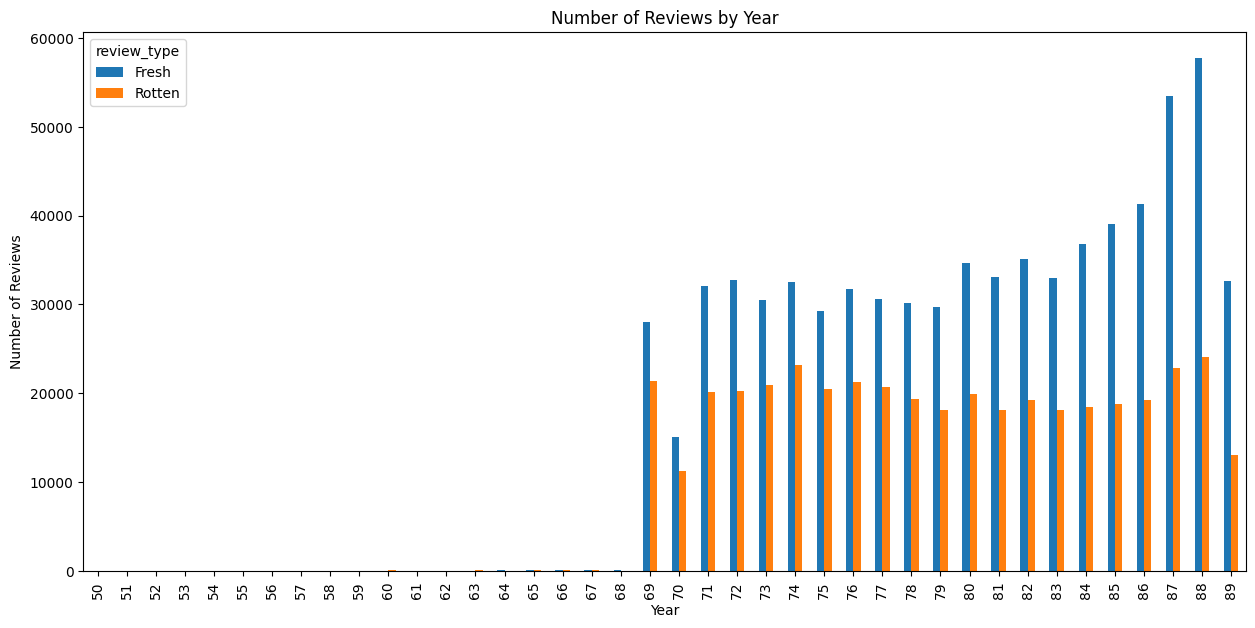

In [20]:
import matplotlib.pyplot as plt

rt_grouped.plot(kind='bar', y=['Fresh', 'Rotten'], stacked=False, figsize=(15, 7))

plt.title('Number of Reviews by Year')
plt.ylabel('Number of Reviews')
plt.xlabel('Year')
plt.show()


In [28]:
# Calculate the total reviews for each year
rt_grouped['Total'] = rt_grouped['Fresh'] + rt_grouped['Rotten']

# Calculate the percentages
rt_grouped['% Fresh'] = (rt_grouped['Fresh'] / rt_grouped['Total']) * 100
rt_grouped['% Rotten'] = (rt_grouped['Rotten'] / rt_grouped['Total']) * 100

# Keeping only the columns of interest
rt_grouped_percentage = rt_grouped[['% Fresh', '% Rotten']]


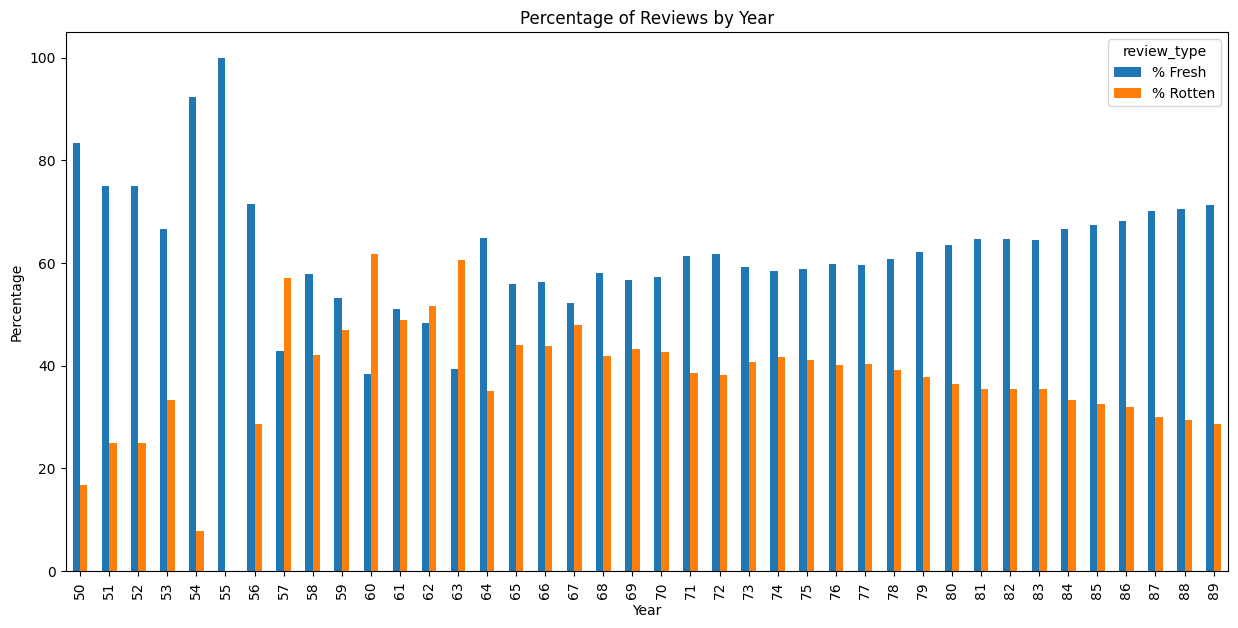

In [24]:
import matplotlib.pyplot as plt

rt_grouped_percentage.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.title('Percentage of Reviews by Year')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.show()


In [25]:
rt_grouped_percentage['% Rotten'] = -rt_grouped_percentage['% Rotten']


/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_74826/4054437769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_grouped_percentage['% Rotten'] = -rt_grouped_percentage['% Rotten']


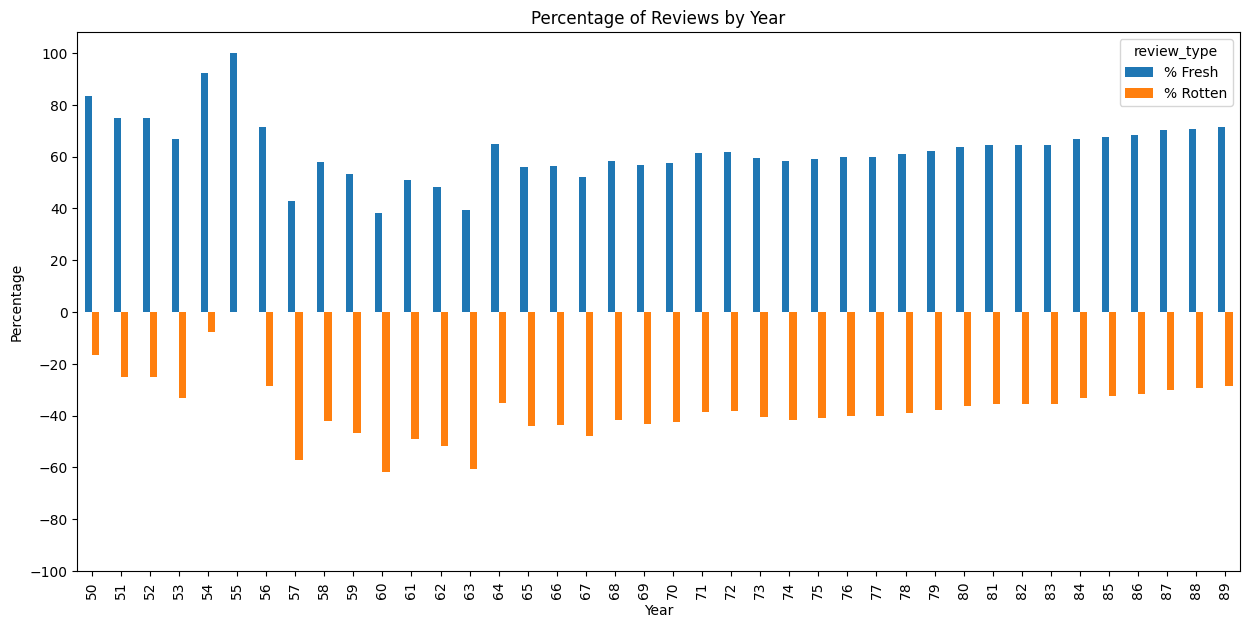

In [26]:
import matplotlib.pyplot as plt

ax = rt_grouped_percentage.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.title('Percentage of Reviews by Year')
plt.ylabel('Percentage')
plt.xlabel('Year')
ax.set_yticks(list(range(-100, 101, 20)))  # Adjust y-ticks for better clarity
plt.show()


In [29]:
rt_grouped_percentage

review_type,% Fresh,% Rotten
50,83.333333,16.666667
51,75.000000,25.000000
52,75.000000,25.000000
53,66.666667,33.333333
54,92.307692,7.692308
55,100.000000,0.000000
56,71.428571,28.571429
57,42.857143,57.142857
58,57.894737,42.105263
59,53.125000,46.875000
